In [1]:
import KD_detector

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import os
import random
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from keras.models import load_model
from tensorflow.keras.utils import plot_model

C:\Users\Leonardo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 96 from PyObject
C:\Users\Leonardo\anaconda3\lib\site-packages\h5py\__init__.py:46: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  from ._conv import register_converters as _register_converters


In [3]:
imgs_path = "Dataset"

C:\Users\Leonardo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
train_images, train_labels = KD_detector.read_dataset(dataset='train', path=imgs_path, filter='none', size=-1)

  0%|▎                                                                                 | 3/781 [00:00<00:26, 29.31it/s]

Kidney_stone


  0%|▍                                                                                | 5/1009 [00:00<00:20, 48.57it/s]

Normal


100%|██████████████████████████████████████████████████████████████████████████████| 1009/1009 [00:18<00:00, 53.14it/s]


In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_labels_encoded = le.fit_transform(train_labels)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels_encoded, test_size=0.1, random_state=42)

In [7]:
X_train = X_train / 255.0

In [8]:
y_train_onehot = to_categorical(y_train, num_classes=2)

In [9]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (1611, 254, 254)
X_test:  (179, 254, 254)
y_train:  (1611,)
y_test:  (179,)


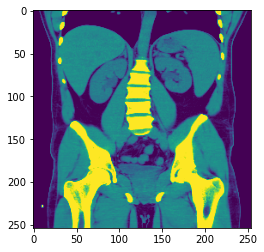

In [10]:
plt.imshow(X_train[1])

In [11]:
from keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from keras import regularizers

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='valid', input_shape=(254, 254, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

model.add(Flatten())

model.add(Dense(units=150, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=100, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=2, activation='softmax'))

In [15]:
#plot_model(model, to_file="model_topology.png", show_shapes=True, show_layer_activations=True)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 16)      160       
                                                                 
 activation (Activation)     (None, 252, 252, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 activation_1 (Activation)   (None, 124, 124, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                    

In [17]:
#plot_model(model, to_file="model_topology.png")

In [20]:
model_filepath = "Model/model-{epoch:02d}-{val_accuracy:.4f}.h5"

In [21]:
checkpoint = ModelCheckpoint(filepath=model_filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [22]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train_onehot, epochs=150, batch_size=32, validation_split=0.1, callbacks=[checkpoint])

Epoch 1/150
46/46 [==============================] - ETA: 0s - loss: 1.9508 - accuracy: 0.5576
Epoch 1: val_accuracy improved from -inf to 0.54938, saving model to Model\model-01-0.5494.h5
46/46 [==============================] - 78s 2s/step - loss: 1.9508 - accuracy: 0.5576 - val_loss: 1.1768 - val_accuracy: 0.5494
Epoch 2/150
46/46 [==============================] - ETA: 0s - loss: 0.9935 - accuracy: 0.5652
Epoch 2: val_accuracy improved from 0.54938 to 0.56173, saving model to Model\model-02-0.5617.h5
46/46 [==============================] - 75s 2s/step - loss: 0.9935 - accuracy: 0.5652 - val_loss: 0.8662 - val_accuracy: 0.5617
Epoch 3/150
46/46 [==============================] - ETA: 0s - loss: 0.8001 - accuracy: 0.5714
Epoch 3: val_accuracy did not improve from 0.56173
46/46 [==============================] - 78s 2s/step - loss: 0.8001 - accuracy: 0.5714 - val_loss: 0.7548 - val_accuracy: 0.5494
Epoch 4/150
46/46 [==============================] - ETA: 0s - loss: 0.7279 - accuracy

In [24]:
X_test = X_test / 255.0

In [25]:
y_test_onehot = to_categorical(y_test, num_classes=2)

In [26]:
model.evaluate(X_test, y_test_onehot, verbose=1)

6/6 [==============================] - 2s 344ms/step - loss: 0.2730 - accuracy: 0.9609


[0.27301162481307983, 0.9608938694000244]

In [27]:
prediction = model.predict(X_test)

6/6 [==============================] - 2s 309ms/step


In [28]:
y_pred = np.argmax(prediction, axis=1)

In [29]:
print('Predicted: ', y_pred[0:30])
print('Actual:    ', y_test[0:30])

Predicted:  [1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0]
Actual:     [1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0]


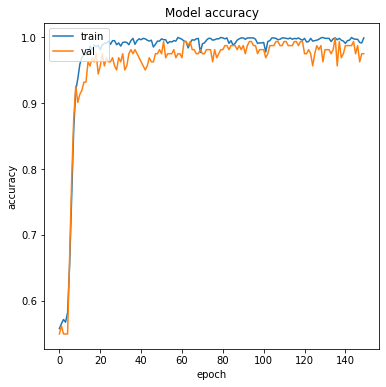

In [30]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.set_title('Model accuracy')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.legend(['train', 'val'], loc='upper left')

In [31]:
target_names = ['KD', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          KD       1.00      0.91      0.95        81
      Normal       0.93      1.00      0.97        98

    accuracy                           0.96       179
   macro avg       0.97      0.96      0.96       179
weighted avg       0.96      0.96      0.96       179



In [32]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [33]:
print(cm)

[[74  7]
 [ 0 98]]


In [34]:
def plot_cm(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    fig, ax = plt.subplots(figsize=(6,6))    
    ax = sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)
    
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    tick_marks = [0.5, 1.5]
    print(tick_marks)
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)
    
    plt.tight_layout()
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

In [35]:
cm_plot_labels = ['KD', 'Normal']

[0.5, 1.5]


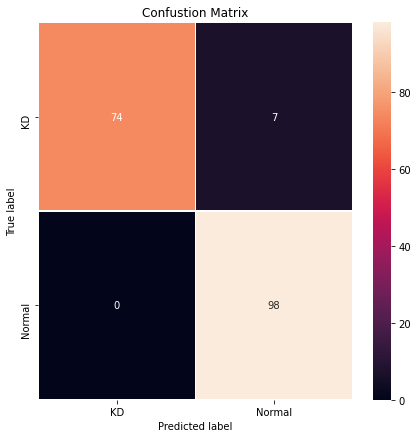

In [36]:
plot_cm(cm=cm, classes=cm_plot_labels, title='Confustion Matrix')

In [37]:
print(y_pred[6])

1


In [38]:
def plot_images(X_test, y_pred, y_test, grid_size):
    font_style = {'fontsize': 12, 'fontweight': 2}
    rows = grid_size[0]
    cols = grid_size[1]
    panel = rows*cols
    fig = plt.figure(figsize=(20, 20))  # width, height in inches
    for i in range(0, panel):
        ax = fig.add_subplot(rows, cols, i + 1)
        
        if y_pred[i] == 1 and y_pred[i] == y_test[i]:
            kd_percent = np.min(prediction[i]) * 100
            nm_percent = np.max(prediction[i]) * 100
            color = 'green'
        elif y_pred[i] == 0 and y_pred[i] == y_test[i]:
            kd_percent = np.max(prediction[i]) * 100
            nm_percent = np.min(prediction[i]) * 100
            color = 'green'
        elif y_pred[i] == 1 and y_pred[i] != y_test[i]:
            kd_percent = np.min(prediction[i]) * 100
            nm_percent = np.max(prediction[i]) * 100
            color = 'red'
        elif y_pred[i] == 0 and y_pred[i] != y_test[i]:
            kd_percent = np.max(prediction[i]) * 100
            nm_percent = np.min(prediction[i]) * 100
            color = 'red'

        ax.set_title(f"Kidney_stone: {kd_percent:.2f}%\nNormal: {nm_percent:.2f}%", fontdict=font_style, color=color)
            
        ax.imshow(X_test[i], interpolation='nearest', cmap='gray')
    
    fig.tight_layout()

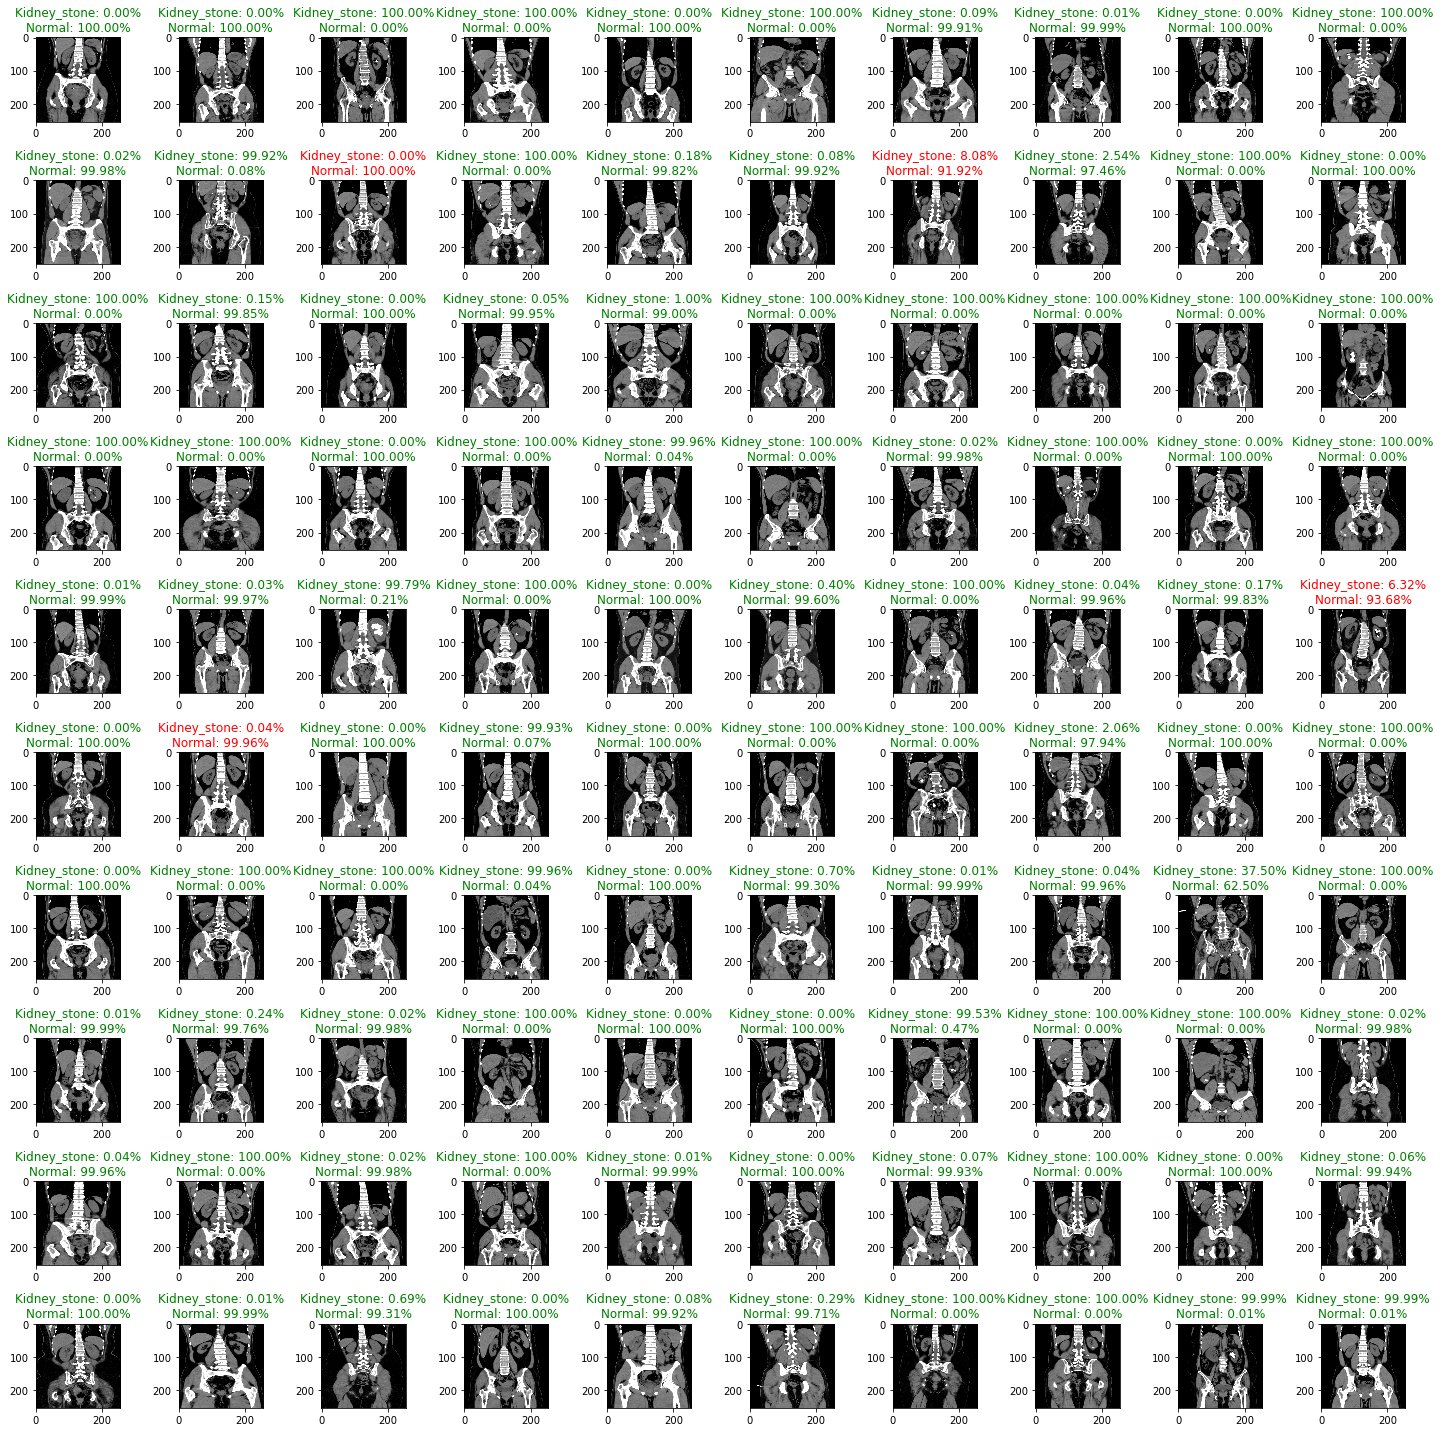

In [39]:
plot_images(X_test, y_pred, y_test, grid_size=(10,10))